# Predicting Flight Delays

---

In [1]:
# General Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# R1.1 Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

#R1.2 Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#R1.3 Imports
from sklearn.ensemble import RandomForestClassifier


## Data Preperation

Little data preperation is needed for these models as the initial cleaning is perfect for the needs. There will just be different subsets for each.


In [2]:
df = pd.read_csv("../data/ORD_11_21-11-22_model.csv")

In [3]:
# test = True # this is a temporary flag so it can run quickly
# if test:
#     df = df.iloc[0:1001]

## Logistic Regression (2 Classes)

In [4]:
# Two class subset
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DestAirportSeqID', 'DepDelay', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrDel15']

In [5]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)


In [6]:
fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)

In [7]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

Text(0.5, 1.0, 'Arrival Delay Confusion Matrix (Logistic Regression)')

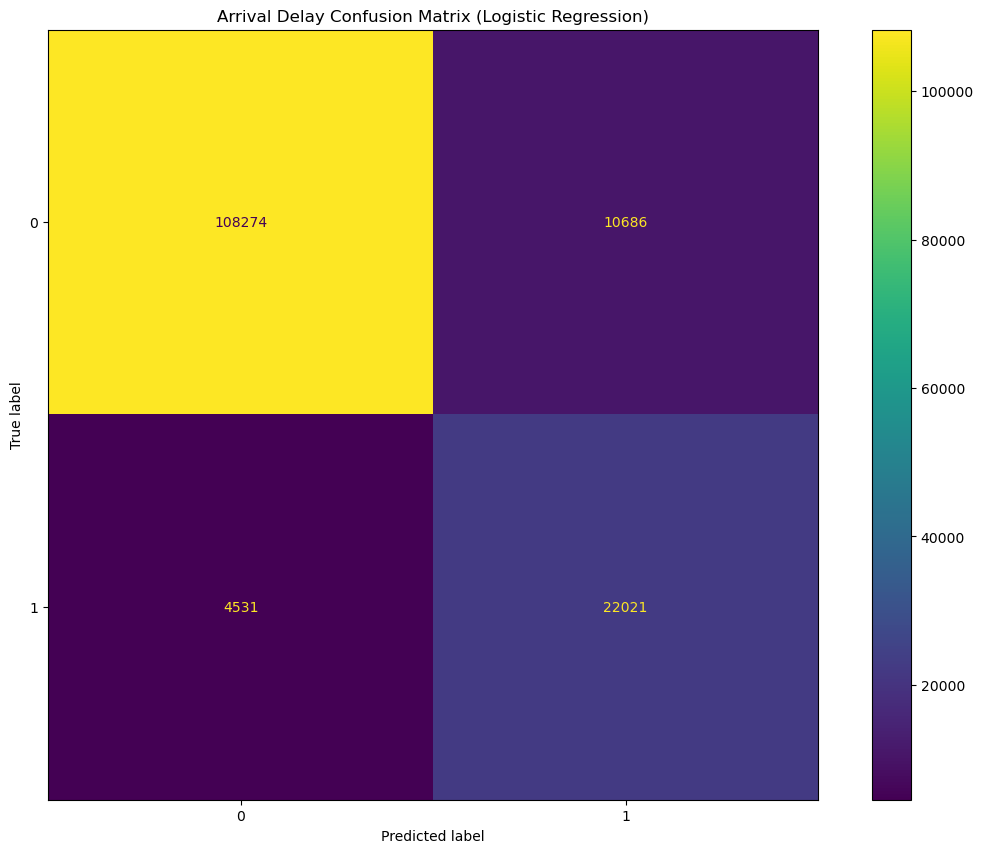

In [8]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Confusion Matrix (Logistic Regression)")

In [9]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")
print(f"Precision of Model: {precision_score(y_test, y_pred)}")
print(f"Recall of Model: {recall_score(y_test, y_pred)}")

Accuracy of Model: 0.8954244323492221
Precision of Model: 0.6732809490323173
Recall of Model: 0.8293537210003012


AUC Score: 0.9409681900539839


Text(0.5, 1.0, 'Arrival Delay ROC Curve (Random Forrest Decision Tree)')

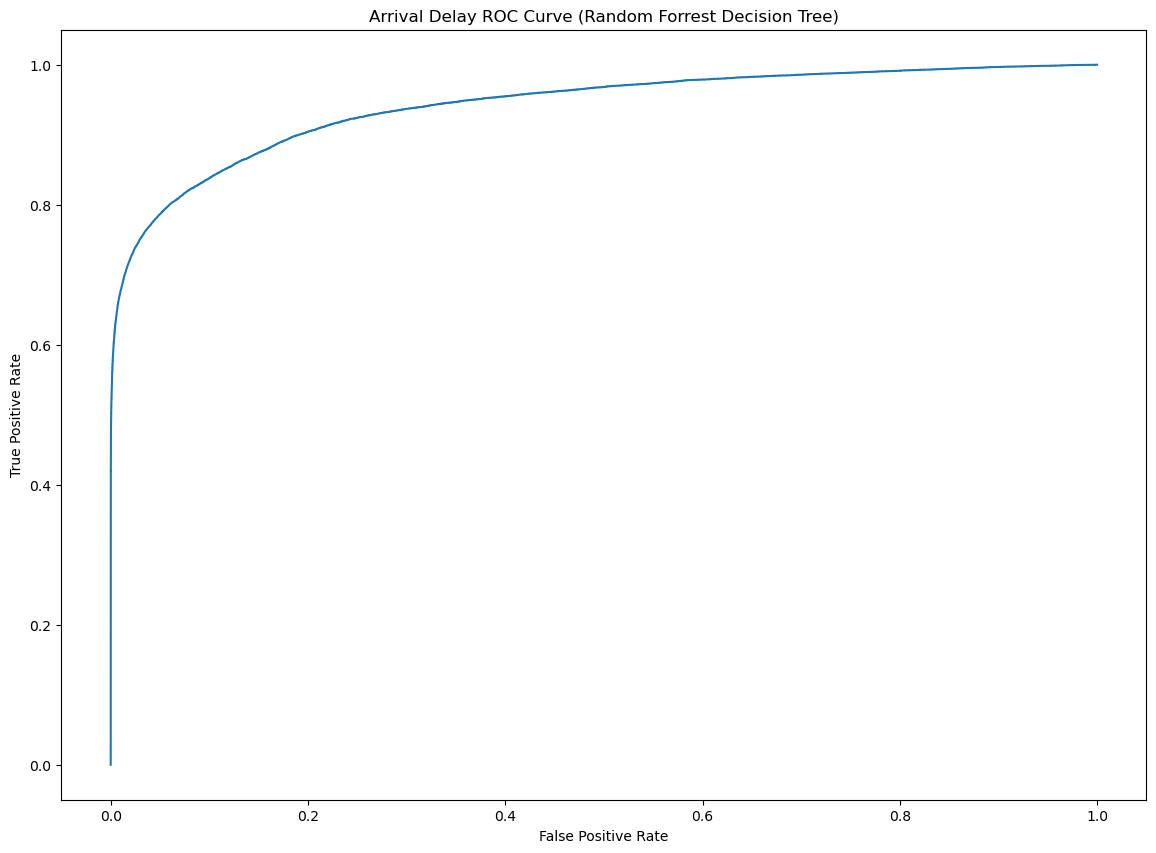

In [10]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print(f"AUC Score: {auc}")

ax1.plot(fpr, tpr)
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title("Arrival Delay ROC Curve (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Arrival Delay Precision Vs. Recall (Logistic Regression)')

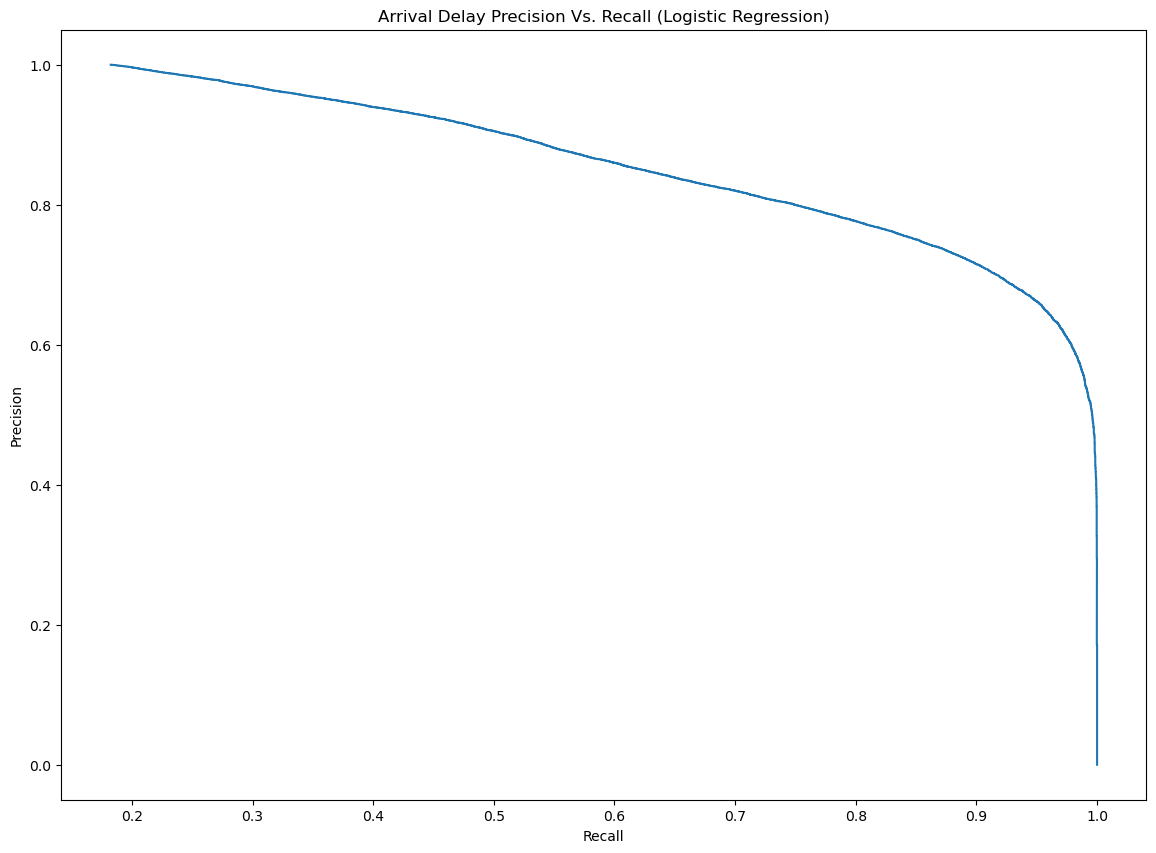

In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
prec, recall, _ = precision_recall_curve(y_test, y_prob)

ax1.plot(prec, recall)
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')
ax1.set_title("Arrival Delay Precision Vs. Recall (Logistic Regression)")

## Logistic Regression (Multiple Classes)

In [12]:
# Multi class subset **overwriting variables**
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrivalDelayGroups']

In [13]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [14]:
# fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)
fit = LogisticRegression(solver='sag', max_iter=10000, multi_class='multinomial').fit(x_train, y_train)

In [15]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

Text(0.5, 1.0, 'Arrival Delay Group Confusion Matrix (Logistic Regression)')

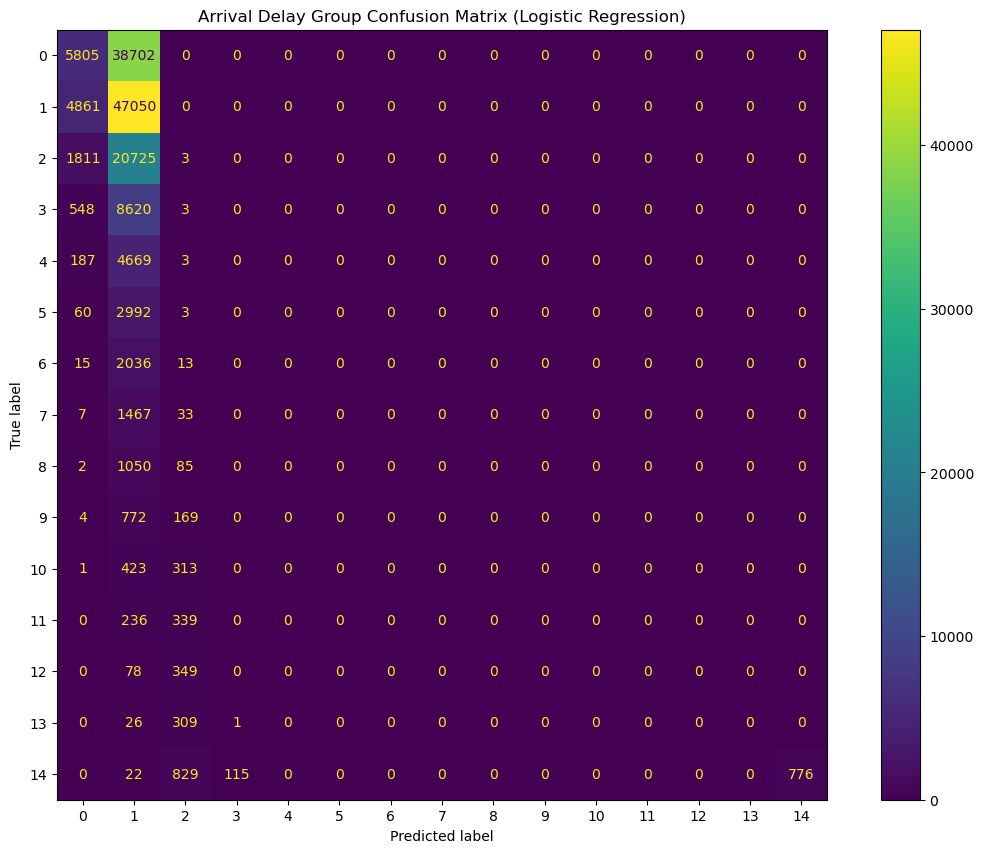

In [16]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Group Confusion Matrix (Logistic Regression)")

In [17]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")

Accuracy of Model: 0.3685881576777173


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.44      0.13      0.20     44507
        -1.0       0.37      0.91      0.52     51911
         0.0       0.00      0.00      0.00     22539
         1.0       0.00      0.00      0.00      9171
         2.0       0.00      0.00      0.00      4859
         3.0       0.00      0.00      0.00      3055
         4.0       0.00      0.00      0.00      2064
         5.0       0.00      0.00      0.00      1507
         6.0       0.00      0.00      0.00      1137
         7.0       0.00      0.00      0.00       945
         8.0       0.00      0.00      0.00       737
         9.0       0.00      0.00      0.00       575
        10.0       0.00      0.00      0.00       427
        11.0       0.00      0.00      0.00       336
        12.0       1.00      0.45      0.62      1742

    accuracy                           0.37    145512
   macro avg       0.12      0.10      0.09    145512
weighted avg       0.28   

c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forrest Decision Tree (2 Class)

In [19]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime', 'CRSArrTime',
 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrDel15']

In [20]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
df_x, df_y = oversample.fit_resample(df_x, df_y)

In [22]:
rfc = RandomForestClassifier(random_state=15).fit(x_train, y_train)

In [23]:
rfc_pred = rfc.predict(x_test)

In [24]:
print(f"Accuracy of Model: {accuracy_score(y_test, rfc_pred)}")

Accuracy of Model: 0.9511105613282753


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.82      0.02      0.03    118913
         1.0       0.18      0.00      0.00     26599
        12.0       0.00      0.00      0.00         0

    accuracy                           0.01    145512
   macro avg       0.20      0.00      0.01    145512
weighted avg       0.70      0.01      0.03    145512



c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Arrival Delay Confusion Matrix (Random Forrest Decision Tree)')

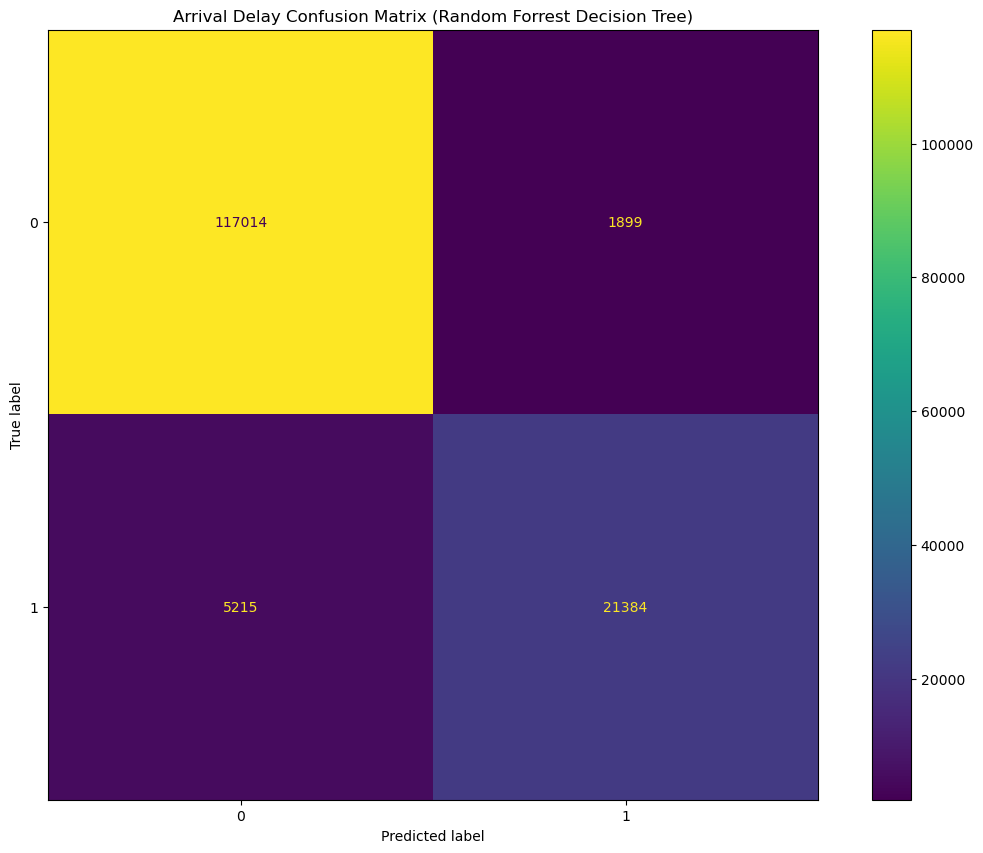

In [26]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, rfc_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Confusion Matrix (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Arrival Delay  Random Forest Variable Importance')

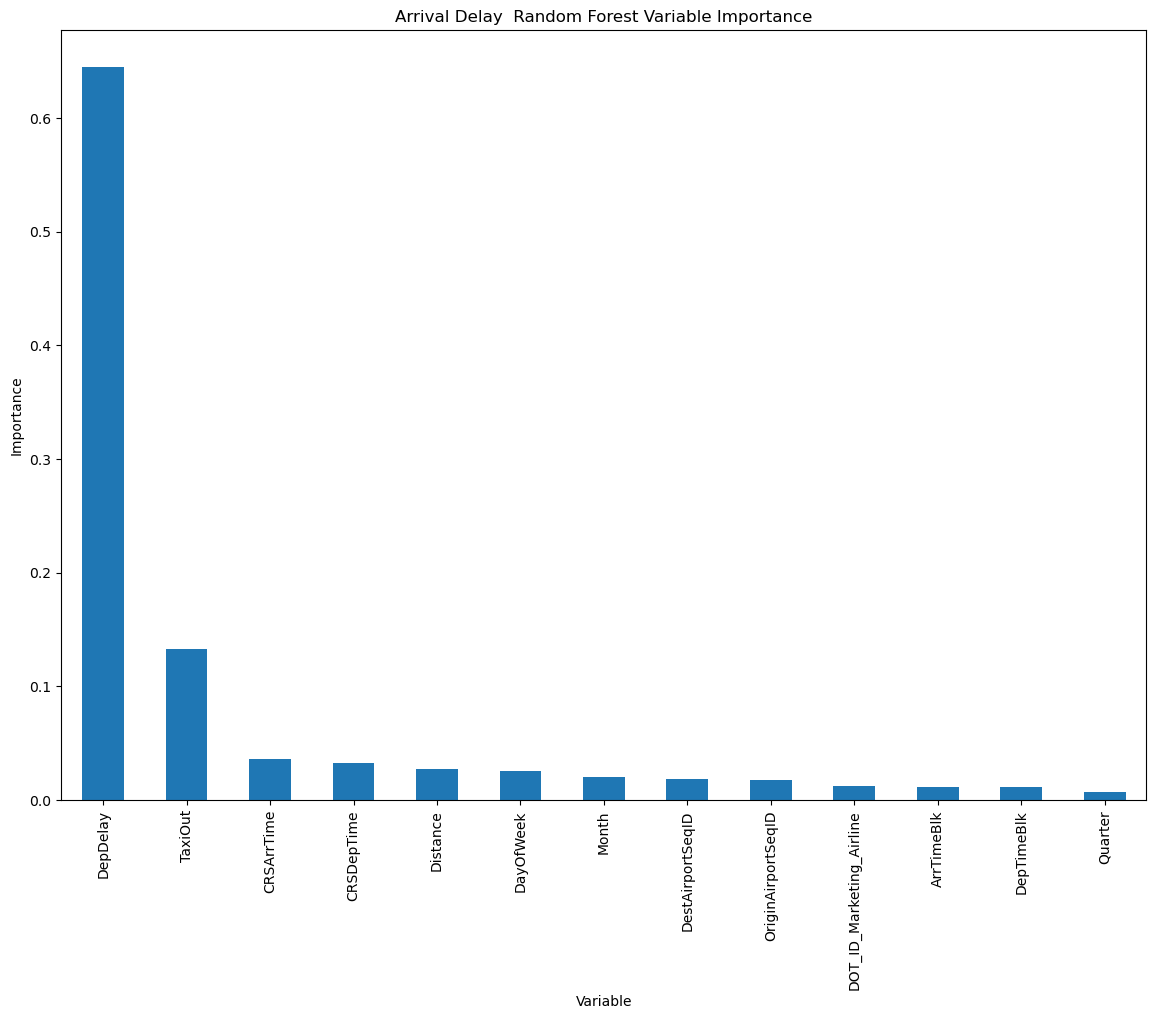

In [27]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
feature_importance = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importance.plot.bar(ax=ax1)
ax1.set_xlabel("Variable")
ax1.set_ylabel("Importance")
ax1.set_title("Arrival Delay  Random Forest Variable Importance")

## Random Forest Decision Tree (Multi-Class)

In [28]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime', 'CRSArrTime',
 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrivalDelayGroups']

In [29]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
df_x, df_y = oversample.fit_resample(df_x, df_y)

In [31]:
rfc = RandomForestClassifier(random_state=15).fit(x_train, y_train)

In [32]:
rfc_pred = rfc.predict(x_test)

In [33]:
print(f"Accuracy of Model: {accuracy_score(y_test, rfc_pred)}")

Accuracy of Model: 0.6055857936115234


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.31      0.09      0.14     44347
        -1.0       0.36      0.89      0.51     51956
         0.0       0.15      0.02      0.03     22593
         1.0       0.09      0.00      0.00      9200
         2.0       0.00      0.00      0.00      4737
         3.0       0.00      0.00      0.00      3170
         4.0       0.00      0.00      0.00      2204
         5.0       0.00      0.00      0.00      1559
         6.0       0.00      0.00      0.00      1183
         7.0       0.00      0.00      0.00       902
         8.0       0.00      0.00      0.00       666
         9.0       0.00      0.00      0.00       529
        10.0       0.00      0.00      0.00       462
        11.0       0.00      0.00      0.00       341
        12.0       0.01      0.00      0.00      1663

    accuracy                           0.35    145512
   macro avg       0.06      0.07      0.05    145512
weighted avg       0.25   

c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Arrival Delay Group Confusion Matrix (Random Forrest Decision Tree)')

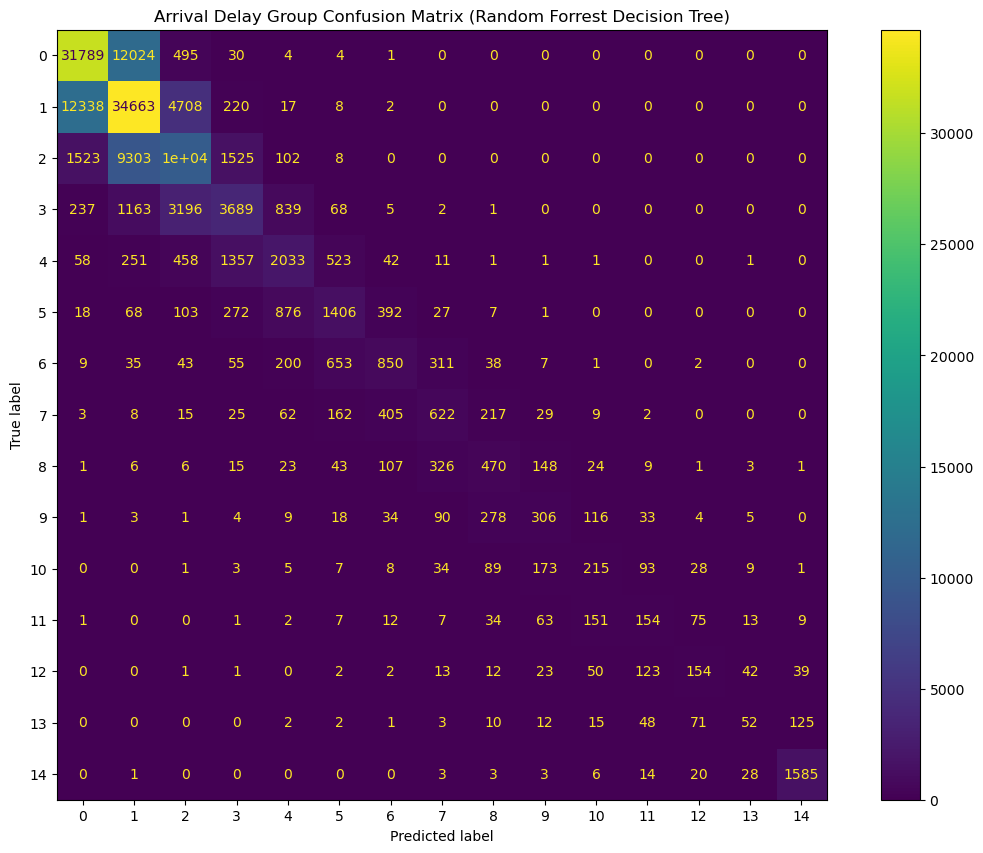

In [35]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, rfc_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Group Confusion Matrix (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Arrival Delay Group Random Forest Variable Importance')

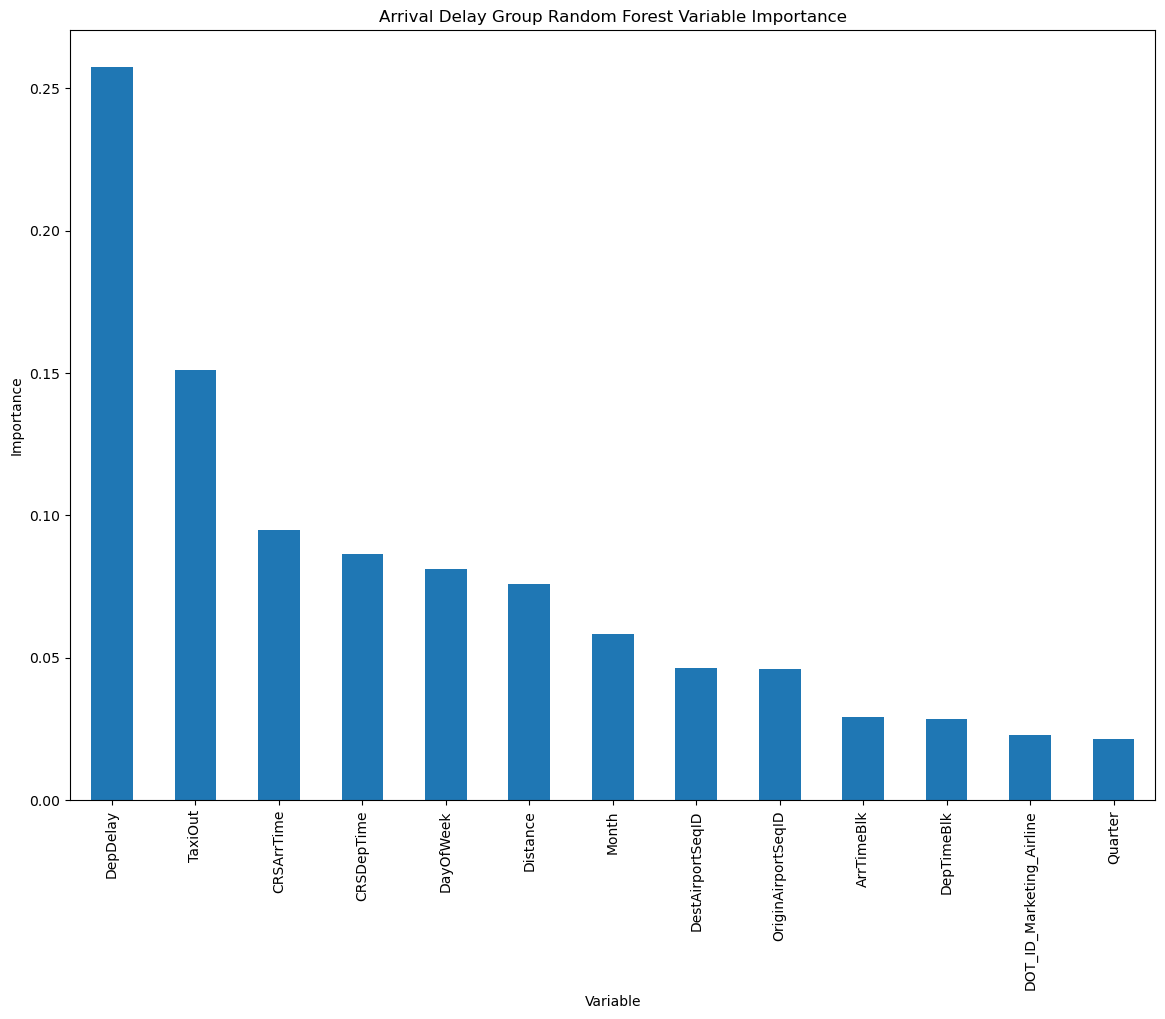

In [36]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
feature_importance = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importance.plot.bar(ax=ax1)
ax1.set_xlabel("Variable")
ax1.set_ylabel("Importance")
ax1.set_title("Arrival Delay Group Random Forest Variable Importance")